<a href="https://colab.research.google.com/github/DeeeTeeee/Vodafone-Corporation---Classification-ML-Project/blob/master/customer_churn_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vodafone Corporation -- ML Project
## Customer Churn EDA and ML

## Importing Packages

In [ ]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import scipy.stats as stats
from scipy.stats import chi2_contingency

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, fbeta_score
from sklearn.metrics import confusion_matrix

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Other packages
from tabulate import tabulate
import os, pickle

import warnings
warnings.filterwarnings('ignore')

import pickle

##  Load Data

In [ ]:
# voda = pd.read_csv('Telco-Customer-Churn.csv')

# voda.sample(50)
path = '/content/Telco-Customer-Churn.csv'


voda = pd.read_csv(path)
voda.sample(50)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3013,2065-MMKGR,Female,0,No,No,29,Yes,Yes,DSL,No,...,No,No,Yes,Yes,One year,Yes,Credit card (automatic),71.00,2080.1,No
1729,8226-BXGES,Male,0,Yes,No,64,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Bank transfer (automatic),89.45,5692.65,No
5588,1660-HSOOQ,Male,0,No,No,1,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,49.65,49.65,Yes
5855,2338-BQEZT,Female,0,No,No,55,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),50.55,2832.75,No
6673,3798-EPWRR,Female,1,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,43.95,85.1,No
3140,7901-HXJVA,Male,0,No,No,14,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Electronic check,76.45,1117.55,No
695,2480-JZOSN,Female,0,Yes,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.65,20.65,No
5217,5018-HEKFO,Female,0,No,No,10,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,24.50,270.15,No
1837,1349-WXNGG,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.05,20.05,Yes
2874,8347-GDTMP,Female,0,Yes,No,64,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.45,1225.65,No


### Data Understanding
This is a telecommunications company's customer dataset, containing various demographic and usage information for each customer, as well as whether or not they have churned (i.e. cancelled their service). Here are the meanings of the columns:

- customerID: unique identifier for each customer
- gender: customer gender (Male/Female)
- SeniorCitizen: indicates if the customer is a senior citizen or not (1, 0)
- Partner: indicates if the customer has a partner or not (Yes, No)
- Dependents: indicates if the customer has dependents or not (Yes, No)
- tenure: number of months the customer has stayed with the company
- PhoneService: indicates if the customer has a phone service or not (Yes, No)
- MultipleLines: indicates if the customer has multiple lines or not (Yes, No, No phone service)
- InternetService: type of internet service the customer has (DSL, Fiber optic, No)
- OnlineSecurity: indicates if the customer has online security or not (Yes, No, No internet service)
- DeviceProtection: indicates if the customer has device protection or not (Yes, No, No internet service)
- TechSupport: indicates if the customer has tech support or not (Yes, No, No internet service)
- StreamingTV: indicates if the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies: indicates if the customer has streaming movies or not (Yes, No, No internet service)
- Contract: type of contract the customer has (Month-to-month, One year, Two year)
- PaperlessBilling: indicates if the customer has paperless billing or not (Yes, No)
- PaymentMethod: payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges: amount charged to the customer monthly
- TotalCharges: total amount charged to the customer
- Churn: indicates if the customer has churned or not (Yes, No)

## Exploratory Data Analysis

#### Data Overview

In [ ]:
# Checking the data types of all the columns
voda.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
# Check the descriptive statistics of numeric variables
voda.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


##### Comment

SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [ ]:
voda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Issues with Dataset:
* Datatype issues : Total charges should be in float dtype
* No missing data
* No duplicates
* The tenure columns needs to be categorized
* There are eleven blank values in the total charges column <br>

#### Approach:
* Change the datatype of the TotalCharges column to numeric.
* Fill the null values with '0' since those columns correspond to customers that have not began their sbscription with the telco company.
* Binning the tenure columns
* Encoding the Churn column into 1's and 0's

#### Data Cleaning

In [ ]:
#Create a copy of the original data
data = voda.copy() 

##### Cleaning TotalCharges Column

In [ ]:
#Typecast TotalCharges column to numeric
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')

#Checking number of missing values
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#Fillin with 0s
data['TotalCharges'] = data['TotalCharges'].fillna(0)

##### Creating bins for tenure column

In [ ]:
# Create new bin labels
labels = ["1-12", "13-24", "25-36","37-48", "49-60", "61-72"]

# Group tenure into new bins and update column
data['tenure_group'] = pd.cut(data.tenure, [1, 13, 25, 37, 49, 61, 73], right=False, labels=labels)

# Count values in new bins and sort by index
tenure_counts = data['tenure_group'].value_counts().sort_index()

##### Dropping Columns

In [ ]:
#drop column customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)

#### **Questions:**
#### 1. What is the most preferred internet service of customers?
#### 2. Understand customer demographics with respect to gender?
#### 3. Which service is most popular with customers?
#### 4. Are customers without dependents likely to have higher charges than those with dependent?

#### **Hypothesis**

##### **Null Hypothesis** : Senior citizen does not correlate with the tendency of customer churn
##### **Alternate Hypothesis** : Senior citizen  correlate with the tendency of customer churn

### Analysis

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


###### Univariate Analysis

##### Univariate Analysis

In [ ]:

for i, predictor in enumerate(data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    fig = px.histogram(data, x=predictor, color='Churn', barmode='group',
                       color_discrete_sequence=['#1f77b4', '#aec7e8'],
                       title=f"Countplot of {predictor} by Churn")
    fig.update_layout(xaxis_title=predictor, yaxis_title="Count",
                      legend_title="Churn", height=400)
    fig.show()


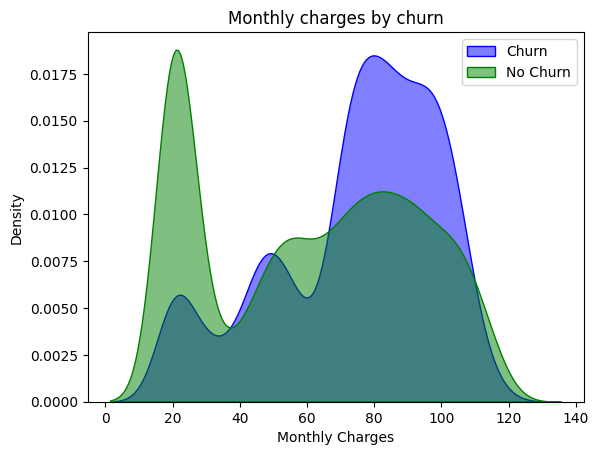

In [ ]:
Mth_Chgs = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'Yes') ],
                color="Blue", fill = True, alpha=.5)
Mth_Chgs = sns.kdeplot(data.MonthlyCharges[(data["Churn"] == 'No') ],
                ax =Mth_Chgs, color="Green", fill= True, alpha=.5)

Mth_Chgs.legend(["Churn", "No Churn"],loc='upper right')
Mth_Chgs.set_ylabel('Density')
Mth_Chgs.set_xlabel('Monthly Charges')
Mth_Chgs.set_title('Monthly charges by churn')

plt.show()

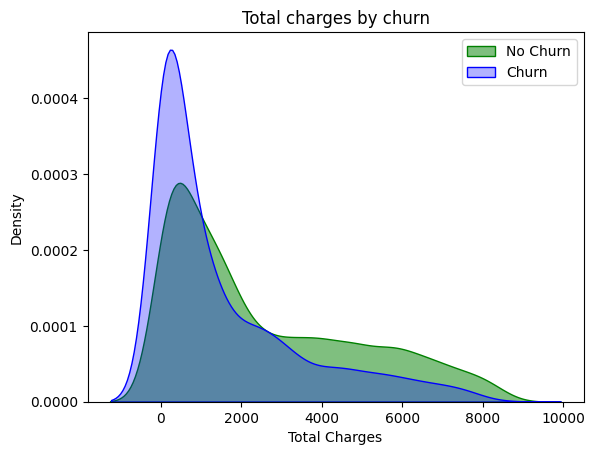

In [ ]:
tot_Chgs = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'No') ],
                color="Green", fill=True, alpha=.5)
tot_Chgs = sns.kdeplot(data.TotalCharges[(data["Churn"] == 'Yes') ],
                ax =tot_Chgs, color="Blue", fill=True, alpha=.3)
tot_Chgs.legend(["No Churn","Churn"],loc='upper right')
tot_Chgs.set_ylabel('Density')
tot_Chgs.set_xlabel('Total Charges')
tot_Chgs.set_title('Total charges by churn');


In [ ]:
fig = px.scatter(data_frame=data, x='MonthlyCharges', y='TotalCharges', 
                 trendline='ols', color='Churn', title='Monthly Charges vs Total Charges')

fig.update_layout(xaxis_title='Monthly Charges', yaxis_title='Total Charges',
                  margin=dict(l=50, r=50, t=50, b=50), height=400)

fig.show()

Derived Insight:

**HIGH** Churn seen in case of **Month to month contracts**, **No online security, No Tech support, First year of subscription** and **Fibre Optics Internet**

**LOW** Churn is seens in case of **Long term contracts, Subscriptions without internet service** and **The customers engaged for 5+ years**


##### Hypothesis Testing

##### Senior citizens and the tendecy to the customer churn

Null Hypothesis : Senior citizen does not correlate with the tendency of customer churn.<br>
Alternate Hypothesis : Senior citizen correlate with the tendency of customer churn.

In [ ]:
data['Churn'] = np.where(data.Churn == 'Yes',1,0)

In [ ]:
from scipy.stats import chi2_contingency
Crosstabresults = pd.crosstab(index= voda['SeniorCitizen'], columns = voda['Churn'])
chisqresult  = chi2_contingency(Crosstabresults)

In [ ]:
print('p-value: ', chisqresult[1])

p-value:  1.510066805092378e-36


Insights:<br>
P-value is less than 0.05, which implies that we reject our null hypothesis. Senior citizen are more likely to churn. 

##### Gender and the tendency to customer churn 

Null Hypothesis :Gender does not correlate with the tendency of customer churn.<br>
Alternate Hypothesis : Gender citizen correlate with the tendency of customer churn.

3. Convert all the categorical variables into dummy variables

In [ ]:
Crosstabresults1 = pd.crosstab(index= voda['gender'], columns = voda['Churn'])
chisqresult1  = chi2_contingency(Crosstabresults1)

In [ ]:
chisqresult1[1]

0.48657873605618596

9. Relationship between Monthly Charges and Total Charges

Insights:<br>
P-value is greater than 0.05, which implies that we accept our null hypothesis. A customer's tendency to churn soes not depend on their gender.


### 1. What is the most preferred internet service of customers?


In [ ]:
#Aggregating count of customers over the internet service columns
inter_serv = voda.groupby('InternetService')['customerID'].count().reset_index()
inter_serv.rename(columns={'customerID':'Number'}, inplace =True)
inter_serv

,InternetService,Number
0,DSL,2421
1,Fiber optic,3096
2,No,1526


In [ ]:
data_inter_serv = inter_serv['Number']
keys = inter_serv['InternetService']
colors = px.colors.qualitative.Set1
explode = [0, 0.09, 0]

fig = go.Figure(data=[go.Pie(labels=keys, values=data_inter_serv, pull=[0.1, 0, 0], 
                             textinfo='label+percent', marker=dict(colors=colors))])
fig.update_layout(title='Customer Internet Preference')
fig.show()

### 2. Understand customer demographics with respect to gender

In [ ]:
#Splitting Data into customer demographic columns
cus_demo = voda.loc[:,'customerID':'Dependents']
cus_demo.rename(columns = {'customerID': 'Number'},inplace = True)
cus_demo

,Number,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


In [ ]:
#Aggregate number of customers over demographic columns: Senior Citizen, Partner and Dependents
cus_demo1 = cus_demo.groupby(['SeniorCitizen','gender'])['Number'].count().reset_index()
cus_demo2 = cus_demo.groupby(['Partner', 'gender'])['Number'].count().reset_index()
cus_demo3 = cus_demo.groupby(['Dependents', 'gender'])['Number'].count().reset_index()

In [ ]:
fig1 = px.bar(cus_demo1, x='SeniorCitizen', y='Number', color='gender', barmode='group',
              category_orders={'SeniorCitizen': [0, 1]}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig2 = px.bar(cus_demo2, x='Partner', y='Number', color='gender', barmode='group',
              category_orders={'Partner': ['Yes', 'No']}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig3 = px.bar(cus_demo3, x='Dependents', y='Number', color='gender', barmode='group',
              category_orders={'Dependents': ['Yes', 'No']}, color_discrete_sequence=px.colors.qualitative.Pastel1)

fig1.update_layout(title='Customer Demographics', xaxis_title='Senior Citizen', yaxis_title='Number')
fig2.update_layout(xaxis_title='Partner', yaxis_title='Number')
fig3.update_layout(xaxis_title='Dependents', yaxis_title='Number')

fig1.show()
fig2.show()
fig3.show()

Insights:
* Majority of  customers are not senior citizens. That is , the client base is largely young people.
* Majority of the customers are not married. 
* Majority of the customers do not have dependents.

### 3. Which service is most popular with customers?

In [ ]:
#slicing vodafone services from the original data
cus_serv = data.loc[:,'PhoneService':'StreamingMovies']

#Aggregating the count over the columns
serv_tally = cus_serv[cus_serv[['PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]=='Yes'].count()

In [ ]:
serv_tally['InternetService'] = inter_serv['Number'].loc[0:1].sum()

In [ ]:
# Sorting in ascending order
serv_tally.sort_values(ascending=True, inplace=True)

# Creating a horizontal bar chart
fig = go.Figure(go.Bar(
    x=serv_tally.values,
    y=serv_tally.index,
    orientation='h',
    marker_color='blue' # Setting color of the bars to blue
))

fig.update_layout(title='Most Popular Service', xaxis_title='Number of Customers')
fig.show()

### 4. Are customers without dependents likely to have higher charges than those with dependent?

In [ ]:
fig = px.box(data_frame=data, x='Dependents', y='MonthlyCharges', color='Dependents',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.update_layout(title='Monthly Charges by Dependents',
                  xaxis_title='Dependents', yaxis_title='Monthly Charges')
fig.show()

### Feature Processing - ML

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [ ]:
y = data['Churn']
X = data.drop('Churn', axis =1)

#### Feature Scaling

In [104]:
# initialize MinMaxScaler object with specified parameters
scaler = MinMaxScaler(feature_range=(0, 1), copy=True)

# select numerical columns to scale
num_cols = X.select_dtypes(include='number').columns

# scale numerical columns using MinMaxScaler
X[num_cols] = scaler.fit_transform(X[num_cols])

In [105]:
# Pickle the scaler
with open('scaler.pickle', 'wb') as file:
    pickle.dump(scaler, file)


#### Feature Encoding

In [ ]:
X = pd.get_dummies(X)
y = LabelEncoder().fit_transform(y)

In [106]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)

# Pickle the encoder
with open('encoder.pickle', 'wb') as file:
    pickle.dump(le, file)


### Data Splitting

In [ ]:
x_train,x_eval,y_train,y_eval=train_test_split(X,y,test_size=0.2)

### Balancing Dataset

Approach:

* In  order to balance the dataset, we can either oversample(increase the minority class) or undersample(decreasing the majority class)
* With regards to our dataset, it would be best to oversample since undersampling has tendency to remove our Not Churn data from the set.

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_train,y_train)

### Modelling 

The following models would be used :

* Decision Tree Classifier 
* Random Forest
* Gradient Boosting Classifier
* Logistic Regression

#### 1. Decision Tree Classifier - Without balancing

In [ ]:
tree_clf = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

##### Decision Tree Predictions

In [ ]:
tree_clf_pred= tree_clf.predict(x_eval)

##### Decision Tree Classification Report

In [ ]:
print(classification_report(y_eval, tree_clf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1019
           1       0.67      0.48      0.56       390

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model..

Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.




##### Decision Tree  Classifier with balancing

In [ ]:
tree_clf_bal = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
tree_clf_bal.fit(X_resampled,y_resampled)
tree_bal_pred = tree_clf_bal.predict(x_eval)

print(metrics.classification_report(y_eval,tree_bal_pred))

              precision    recall  f1-score   support

           0       0.92      0.63      0.75      1019
           1       0.47      0.85      0.60       390

    accuracy                           0.69      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79      0.69      0.71      1409



In [ ]:
print(metrics.confusion_matrix(y_eval, tree_bal_pred))

[[643 376]
 [ 58 332]]


Now we can see quite better results, i.e. Accuracy: 62%, and a very good recall, precision & f1 score for minority class.
Let's try with some other classifier.

#### 2. Random Forest Classifier - Without Balancing

In [ ]:
forest_clf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
forest_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
forest_clf_pred = forest_clf.predict(x_eval)

In [ ]:
print(classification_report(y_eval, forest_clf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1019
           1       0.72      0.46      0.56       390

    accuracy                           0.80      1409
   macro avg       0.77      0.69      0.71      1409
weighted avg       0.79      0.80      0.78      1409



##### Comment:

Good enough, however lets check with the balance dataset

#### 2. Random Forest Classifier - With Balancing

In [ ]:
forest_clf_bal=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
forest_clf_bal.fit(X_resampled,y_resampled)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
forest_bal_pred = forest_clf_bal.predict(x_eval)

In [ ]:
print(metrics.classification_report(y_eval, forest_bal_pred))

              precision    recall  f1-score   support

           0       0.92      0.62      0.74      1019
           1       0.46      0.85      0.60       390

    accuracy                           0.68      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.79      0.68      0.70      1409



In [ ]:
print(metrics.confusion_matrix(y_eval, forest_bal_pred))

[[633 386]
 [ 58 332]]


###### Comment:
 After balancing, the f1 score has marginally improved at the expense of accuracy. This is because prior balancing, the machine was more biased towards the majority class

#### 3. Gradient Boosting Classifier Model _without balancing

In [ ]:
gb_clf = GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8)

In [ ]:
gb_clf.fit(x_train, y_train)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
gb_clf_pred = gb_clf.predict(x_eval)

In [ ]:
print(classification_report(y_eval, gb_clf_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1019
           1       0.68      0.51      0.58       390

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



#### Gradient Boosting Classifier with balancing

In [ ]:
gb_clf_bal = GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8)

In [ ]:
gb_clf_bal.fit(X_resampled,y_resampled)

GradientBoostingClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
gb_bal_pred= gb_clf_bal.predict(x_eval)

In [ ]:
print(metrics.confusion_matrix(y_eval, gb_bal_pred))

[[703 316]
 [ 78 312]]


In [ ]:
print(metrics.classification_report(y_eval, gb_bal_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1019
           1       0.50      0.80      0.61       390

    accuracy                           0.72      1409
   macro avg       0.70      0.74      0.70      1409
weighted avg       0.79      0.72      0.73      1409



##### Comment:

Yes, a far better result with the Gradient Boosting Model on the balanced dataset.. we can still check for more classifiers

#### 4. Logistic Regression - without balancing

In [ ]:
lr = LogisticRegression(C=1.0, random_state=101)

In [ ]:
lr.fit(x_train, y_train)

LogisticRegression(random_state=101)

In [ ]:
# Make predictions on the test data using the fitted model
lr_pred = lr.predict(x_eval)

In [ ]:
print(classification_report(y_eval, lr_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1019
           1       0.68      0.50      0.58       390

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



#### Logistic Regression - with balancing

In [ ]:
lr_bal = LogisticRegression(C=1.0, random_state=101)

In [ ]:
lr_bal.fit(X_resampled,y_resampled)

LogisticRegression(random_state=101)

In [ ]:
lr_bal_pred = lr_bal.predict(x_eval)

In [ ]:
print(metrics.confusion_matrix(y_eval, lr_bal_pred))

[[720 299]
 [ 84 306]]


In [ ]:
print(metrics.classification_report(y_eval, lr_bal_pred))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1019
           1       0.51      0.78      0.62       390

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.79      0.73      0.74      1409



##### Comment
We can see this also is far better: Now that we now the balanced data is better in results.

 ### Model Evaluation

In [ ]:
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
models = [
    (DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8), 'Decision Tree'),
    (RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8), 'Random Forest Classifier'),
    (GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8), 'Gradient Boosting Classifier'),
    (LogisticRegression(C=1.0, random_state=100), 'Logistic Regression Model')
]

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model, model_name in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_eval)

    accuracy = accuracy_score(y_eval, y_pred)
    precision = precision_score(y_eval, y_pred)
    recall = recall_score(y_eval, y_pred)
    f1 = f1_score(y_eval, y_pred)

    metrics_df = metrics_df.append({'Model': model_name, 'Accuracy': accuracy,
                                    'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)
    
    metrics_df = metrics_df.sort_values(by='F1 Score', ascending=False)

# Print the final metrics dataframe
print(metrics_df)


                          Model  Accuracy  Precision    Recall  F1 Score
0  Gradient Boosting Classifier  0.797019   0.675676  0.512821  0.583090
3     Logistic Regression Model  0.796309   0.678201  0.502564  0.577320
1      Random Forest Classifier  0.799858   0.717742  0.456410  0.557994
2                 Decision Tree  0.789212   0.665480  0.479487  0.557377


In [ ]:
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Gradient Boosting Classifier,0.797019,0.675676,0.512821,0.583090
3,Logistic Regression Model,0.796309,0.678201,0.502564,0.577320
1,Random Forest Classifier,0.799858,0.717742,0.456410,0.557994
2,Decision Tree,0.789212,0.665480,0.479487,0.557377


In [ ]:

# Create a list of models and their corresponding parameters
models = [
    (DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=6, min_samples_leaf=8), 'Decision Tree'),
    (RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8), 'Random Forest Classifier'),
    (GradientBoostingClassifier(criterion='friedman_mse', random_state=100, max_depth=6, min_samples_leaf=8), 'Gradient Boosting Classifier'),
    (LogisticRegression(C=1.0, random_state=100), 'Logistic Regression Model')

]

metrics_bal_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x_train, y_train)


for model, model_name in models:
    model.fit(X_resampled, y_resampled)
    yr_predict = model.predict(x_eval)

    accuracy = accuracy_score(y_eval, yr_predict)
    precision = precision_score(y_eval, yr_predict)
    recall = recall_score(y_eval, yr_predict)
    f1 = f1_score(y_eval, yr_predict)

    metrics_bal_df =  metrics_bal_df.append({'Model': model_name, 'Accuracy': accuracy,
                                                'Precision': precision, 'Recall': recall, 'F1 Score': f1}, ignore_index=True)

# Sort the dataframe in descending order based on Accuracy
metrics_bal_df =  metrics_bal_df.sort_values(by='F1 Score', ascending=False)

# Print the final metrics dataframe
print( metrics_bal_df)


                          Model  Accuracy  Precision    Recall  F1 Score
3     Logistic Regression Model  0.730305   0.508117  0.802564  0.622266
2  Gradient Boosting Classifier  0.724627   0.501639  0.784615  0.612000
0                 Decision Tree  0.713272   0.489063  0.802564  0.607767
1      Random Forest Classifier  0.687012   0.464034  0.843590  0.598726


In [ ]:
 metrics_bal_df

,Model,Accuracy,Precision,Recall,F1 Score
3,Logistic Regression Model,0.730305,0.508117,0.802564,0.622266
2,Gradient Boosting Classifier,0.724627,0.501639,0.784615,0.612000
0,Decision Tree,0.713272,0.489063,0.802564,0.607767
1,Random Forest Classifier,0.687012,0.464034,0.843590,0.598726


##### Comment:

From the two tables, it can be observed that:
* Balancing the target variables improved the performance of our models
* The two best performing models based on the F1 score are Gradient Boosting Classifier and Logistic Regression Classifier.

### Hyperparameter Tuning

In [ ]:
models = [ gb_clf_bal, lr_bal]

#### Tuning Gradient Boosting Classifier Model

In [ ]:
models[0].get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 8,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 100,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [ ]:
gb_clf_params = { 'ccp_alpha': [0.0,0.1,0.2],
           'max_depth': [4,6,8],
           'min_samples_leaf': [8, 10, 12],
          'n_estimators': [100,1000]
}

In [ ]:
searcher = GridSearchCV(estimator = gb_clf_bal,
                        param_grid = gb_clf_params,
                        scoring = ['accuracy','balanced_accuracy','f1','precision','recall','roc_auc'],
                        refit = 'balanced_accuracy',
                        cv = 5,
                        verbose = 3)

In [ ]:
searcher.fit(X_resampled,y_resampled)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.912) balanced_accuracy: (test=0.915) f1: (test=0.921) precision: (test=0.949) recall: (test=0.895) roc_auc: (test=0.976) total time=   1.3s
[CV 2/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.949) balanced_accuracy: (test=0.948) f1: (test=0.955) precision: (test=0.957) recall: (test=0.954) roc_auc: (test=0.988) total time=   1.2s
[CV 3/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.962) balanced_accuracy: (test=0.957) f1: (test=0.968) precision: (test=0.946) recall: (test=0.991) roc_auc: (test=0.993) total time=   1.7s
[CV 4/5] END ccp_alpha=0.0, max_depth=4, min_samples_leaf=8, n_estimators=100; accuracy: (test=0.972) balanced_accuracy: (test=0.969) f1: (test=0.976) precision: (test=0.965) recall: (test=0.988) roc_auc: (test=0.996) total tim

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=6,
                                                  min_samples_leaf=8,
                                                  random_state=100),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2], 'max_depth': [4, 6, 8],
                         'min_samples_leaf': [8, 10, 12],
                         'n_estimators': [100, 1000]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [ ]:
gb_clf_tuned = searcher.best_estimator_

In [ ]:
gb_clf_tuned

In [ ]:
models.append(gb_clf_tuned)

In [ ]:
models

#### Tuning the Logistic Regression Model

In [ ]:
models[1].get_params()

In [ ]:
lr_params = { 'C': [1.0,2.0,3.0],
           'max_iter': [1000,10000,100000],
           'intercept_scaling': [1, 2, 3,]
    
    
}

In [ ]:
searcher_lr = GridSearchCV(estimator = lr_bal,
                             param_grid = lr_params,
                             scoring = ['accuracy','balanced_accuracy','f1','precision','recall','roc_auc'],
                             refit = 'balanced_accuracy',
                             cv = 5,
                             verbose = 3
    )

In [ ]:
searcher_lr.fit(X_resampled, y_resampled)

[CV 2/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.928) balanced_accuracy: (test=0.931) f1: (test=0.936) precision: (test=0.960) recall: (test=0.913) roc_auc: (test=0.984) total time=   0.1s
[CV 3/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.946) balanced_accuracy: (test=0.939) f1: (test=0.954) precision: (test=0.930) recall: (test=0.979) roc_auc: (test=0.994) total time=   0.1s
[CV 2/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.928) balanced_accuracy: (test=0.931) f1: (test=0.936) precision: (test=0.960) recall: (test=0.913) roc_auc: (test=0.984) total time=   0.1s
[CV 3/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.946) balanced_accuracy: (test=0.939) f1: (test=0.954) precision: (test=0.930) recall: (test=0.979) roc_auc: (test=0.994) total time=   0.1s
[CV 4/5] END C=1.0, intercept_scaling=1, max_iter=1000; accuracy: (test=0.962) balanced_accuracy: (test=0.961) f1: (test=0.968) precision: (test

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=101),
             param_grid={'C': [1.0, 2.0, 3.0], 'intercept_scaling': [1, 2, 3],
                         'max_iter': [1000, 10000, 100000]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=101),
             param_grid={'C': [1.0, 2.0, 3.0], 'intercept_scaling': [1, 2, 3],
                         'max_iter': [1000, 10000, 100000]},
             refit='balanced_accuracy',
             scoring=['accuracy', 'balanced_accuracy', 'f1', 'precision',
                      'recall', 'roc_auc'],
             verbose=3)

In [ ]:
lr_tuned = searcher_lr.best_estimator_

In [ ]:
models.append(lr_tuned)

In [ ]:
models

### Exporting Key Components

In [ ]:
components = { 'scaler': scaler,
               'model': models
    }

In [ ]:
components

{'scaler': MinMaxScaler(),
 'model': [GradientBoostingClassifier(max_depth=6, min_samples_leaf=8, random_state=100),
  LogisticRegression(random_state=101),
  GradientBoostingClassifier(max_depth=8, min_samples_leaf=12, random_state=100),
  LogisticRegression(C=3.0, max_iter=1000, random_state=101)]}

In [ ]:
#Create Folder
!mkdir export

In [ ]:
#Create a destination folder
destination = os.path.join('.','export')

In [ ]:
#export
with open(os.path.join(destination,'ml.pkl'),'wb') as f:
    pickle.dump(components, f)

In [ ]:
#requirements
!pip freeze requirement.txt

absl-py==1.4.0
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
attrs==23.1.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.2
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
dbus-python==1.2.16
debugpy==1.6.6
decorator==4.4.2
defusedxml==0.7.1
di

In [ ]:
#save file in export
!pip freeze > export/requirement.txt